In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('scores.csv', delimiter = ';')
print (data)

     Exam1  Exam2
0     1.74   4.69
1     3.18   8.84
2     5.85  13.76
3    10.56  18.22
4    15.38  18.69
..     ...    ...
145   9.08  15.88
146   6.36  11.19
147  11.79  17.65
148  15.49  14.49
149  15.03  10.03

[150 rows x 2 columns]


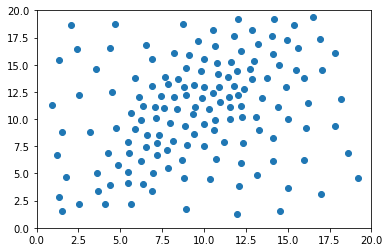

In [4]:
plt.scatter(data['Exam1'], data['Exam2'])
plt.axis([0, 20, 0, 20])
plt.show()

In [5]:
decision = (data['Exam1'] + data['Exam2']) / 2 > 10
print(decision)

0      False
1      False
2      False
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149     True
Length: 150, dtype: bool


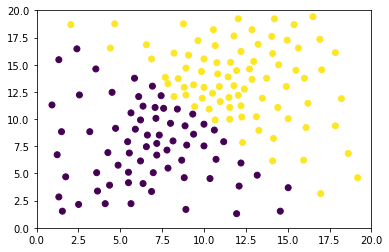

In [6]:
plt.scatter(data['Exam1'], data['Exam2'], c = decision)
plt.axis([0, 20, 0, 20])
plt.show()

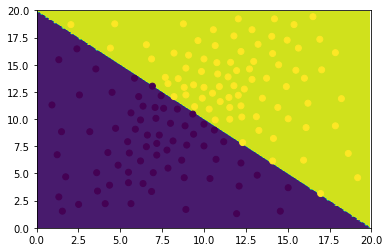

In [7]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = (xx.ravel()+ yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)

plt.axis([0, 20, 0, 20])
plt.scatter(data['Exam1'], data['Exam2'], c = decision)
plt.show()

In [8]:
data2 = pd.read_csv('scores_and_decisions.csv', delimiter = ';')
print (data2)

     Exam1  Exam2  Decision
0     1.74   4.69         0
1     3.18   8.84         0
2     5.85  13.76         0
3    10.56  18.22         1
4    15.38  18.69         1
..     ...    ...       ...
145   9.08  15.88         1
146   6.36  11.19         0
147  11.79  17.65         1
148  15.49  14.49         1
149  15.03  10.03         1

[150 rows x 3 columns]


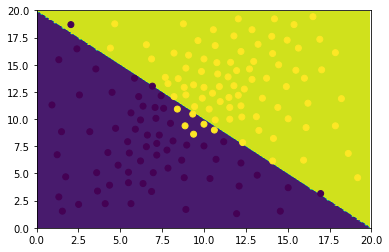

In [9]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.10
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = (xx.ravel()+ yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'])
plt.show()

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd")
Data = data2.to_numpy()
lda.fit(Data[:,0:2], Data[:,2])
decision_pred = lda.predict(Data[:,0:2])

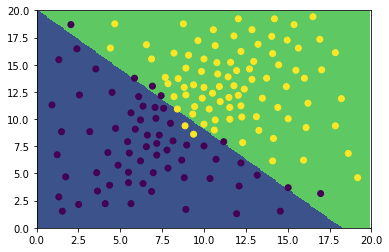

In [11]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, levels = 1)
plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'] )
plt.show()

In [12]:
lda.predict([[19,0]])

array([1.])

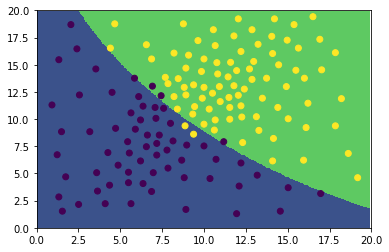

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
Data = data2.to_numpy()
qda.fit(Data[:,0:2], Data[:,2])

decision_pred = qda.predict(Data[:,0:2])

x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, levels = 1)

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'] )
plt.show()

In [16]:
qda.predict([[20,1], [1,20], [9.5,9.5]])

array([0., 0., 1.])

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split = 3,max_depth = 4)
clf.fit(Data[:,0:2], Data[:,2])

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [29]:
clf.predict([[0,20]])

array([0.])

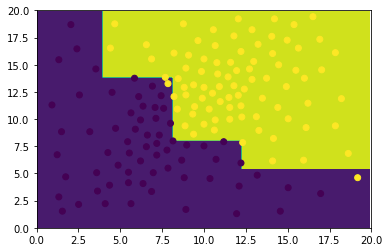

In [22]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.10
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'] )
plt.show()

In [26]:
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=['Test1','Test2'])
print(text_representation)


|--- Test1 <= 8.18
|   |--- Test2 <= 13.14
|   |   |--- class: 0.0
|   |--- Test2 >  13.14
|   |   |--- Test1 <= 3.97
|   |   |   |--- class: 0.0
|   |   |--- Test1 >  3.97
|   |   |   |--- Test2 <= 13.80
|   |   |   |   |--- class: 0.0
|   |   |   |--- Test2 >  13.80
|   |   |   |   |--- class: 1.0
|--- Test1 >  8.18
|   |--- Test2 <= 8.07
|   |   |--- Test1 <= 12.26
|   |   |   |--- class: 0.0
|   |   |--- Test1 >  12.26
|   |   |   |--- Test2 <= 5.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- Test2 >  5.50
|   |   |   |   |--- class: 1.0
|   |--- Test2 >  8.07
|   |   |--- class: 1.0



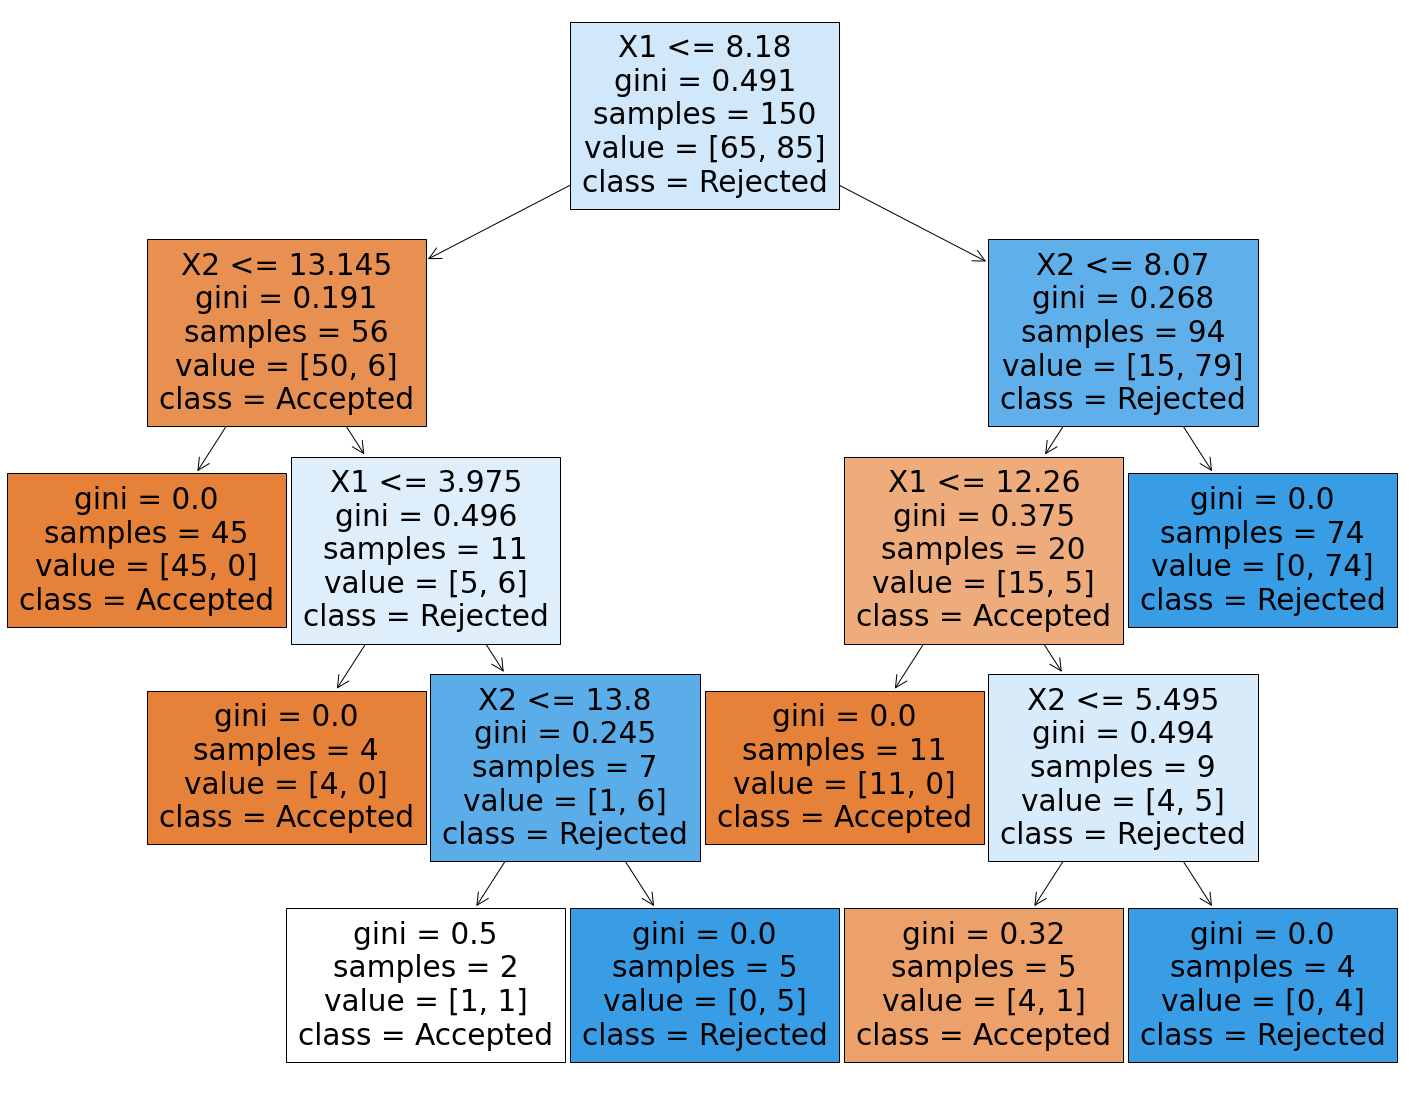

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['X1','X2'],  
                   class_names=['Accepted','Rejected'],
                   filled=True)
